# 01 — Exploratory Data Analysis (EDA)

Goal:
- Load churn dataset
- Validate schema + target column
- Basic statistics
- Churn distribution
- Key relationships (numerical + categorical)


In [2]:
import os
import pandas as pd
import numpy as np

DATA_PATH = "../data/customer_churn.csv"  # update if your file name differs
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe(include="all").T.head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def detect_target_column(columns):
    candidates = ["Churn", "churn", "Exited", "exit", "Attrition", "attrition", "target", "Target", "label", "Label"]
    for c in candidates:
        if c in columns:
            return c
    for c in columns:
        if "churn" in c.lower():
            return c
    return None

TARGET_COL = detect_target_column(df.columns)
TARGET_COL


'Churn'

In [5]:
if TARGET_COL is None:
    raise ValueError("Could not auto-detect target column. Rename your target to 'Churn' or update TARGET_COL manually.")

df[TARGET_COL].value_counts(dropna=False)


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
def normalize_target(series):
    s = series.copy()

    # if already 0/1 numeric
    if pd.api.types.is_numeric_dtype(s):
        uniq = sorted(pd.Series(s.dropna().unique()).tolist())
        if set(uniq).issubset({0,1}):
            return s.astype(int)

    # strings like Yes/No, True/False, churned/not churned
    s = s.astype(str).str.strip().str.lower()
    mapping = {
        "yes": 1, "y": 1, "true": 1, "1": 1, "churn": 1, "churned": 1, "left": 1, "exit": 1, "exited": 1
    }
    s_norm = s.map(lambda x: 1 if x in mapping else 0)
    return s_norm.astype(int)

df["_target"] = normalize_target(df[TARGET_COL])
df["_target"].value_counts()


_target
0    5174
1    1869
Name: count, dtype: int64

In [7]:
missing = (df.isna().mean() * 100).sort_values(ascending=False)
missing.head(20)


customerID          0.0
gender              0.0
Churn               0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
OnlineBackup        0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
dtype: float64

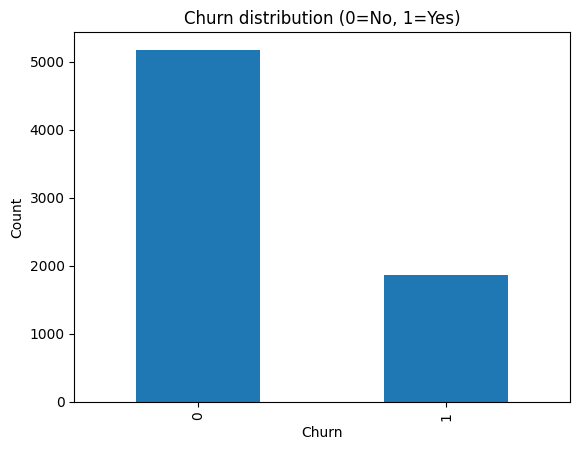

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
df["_target"].value_counts().plot(kind="bar")
plt.title("Churn distribution (0=No, 1=Yes)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [9]:
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c]) and c not in ["_target"]]
num_cols[:20], len(num_cols)


(['SeniorCitizen', 'tenure', 'MonthlyCharges'], 3)

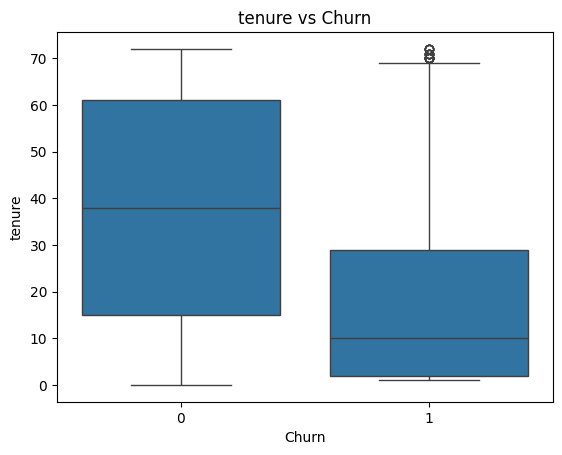

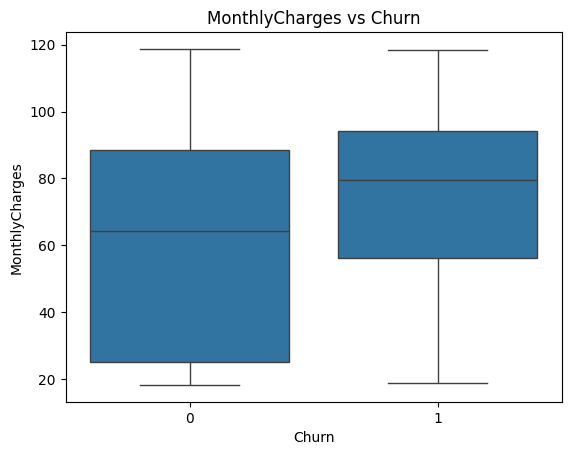

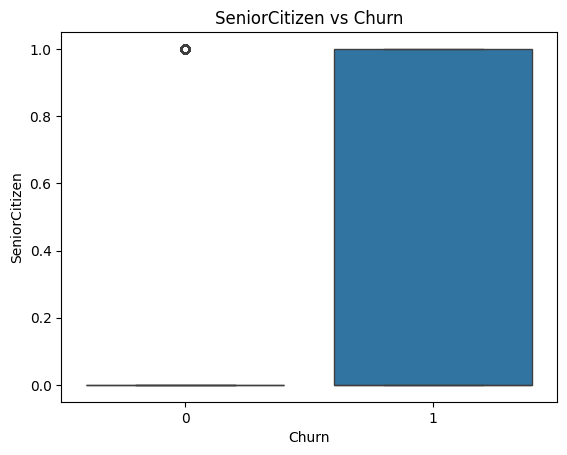

In [10]:
# Plot top 6 numeric columns by correlation to target (if any numeric columns exist)
if len(num_cols) > 0:
    corr = df[num_cols + ["_target"]].corr(numeric_only=True)["_target"].drop("_target").abs().sort_values(ascending=False)
    top = corr.head(6).index.tolist()

    for c in top:
        plt.figure()
        sns.boxplot(x=df["_target"], y=df[c])
        plt.title(f"{c} vs Churn")
        plt.xlabel("Churn")
        plt.show()
else:
    print("No numeric columns detected.")


In [11]:
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in [TARGET_COL]]
cat_cols[:20], len(cat_cols)


(['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'],
 17)

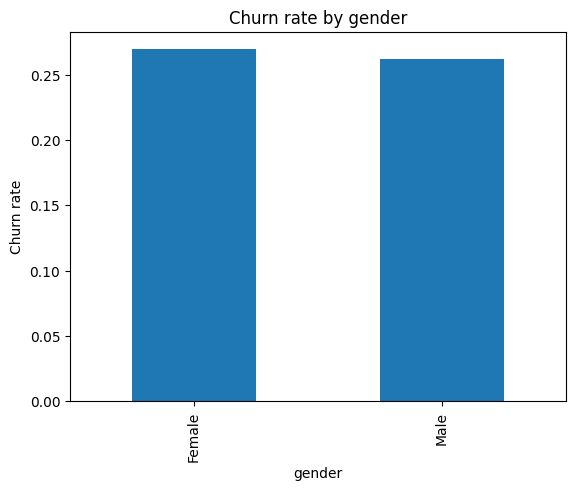

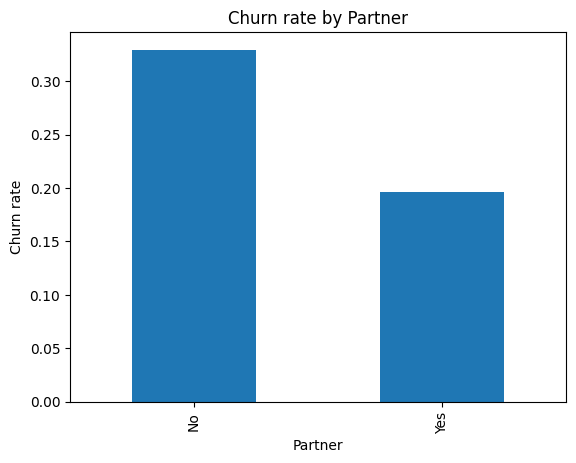

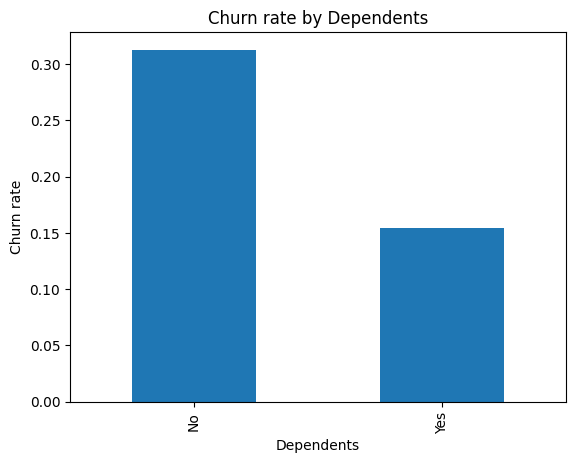

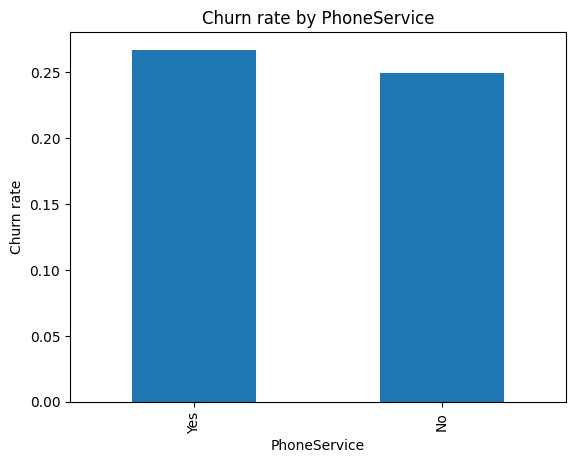

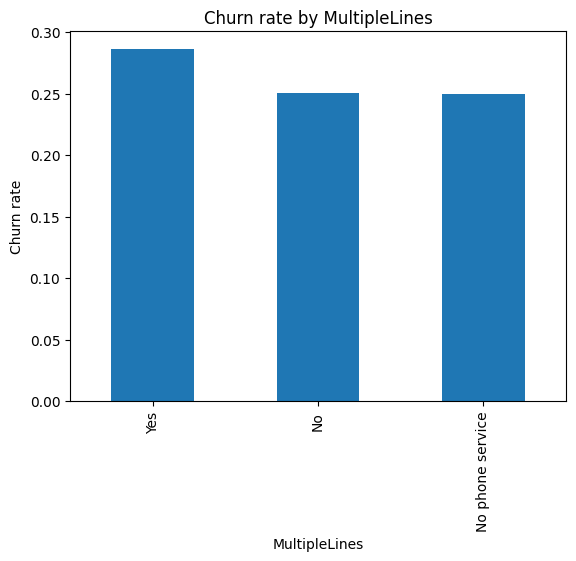

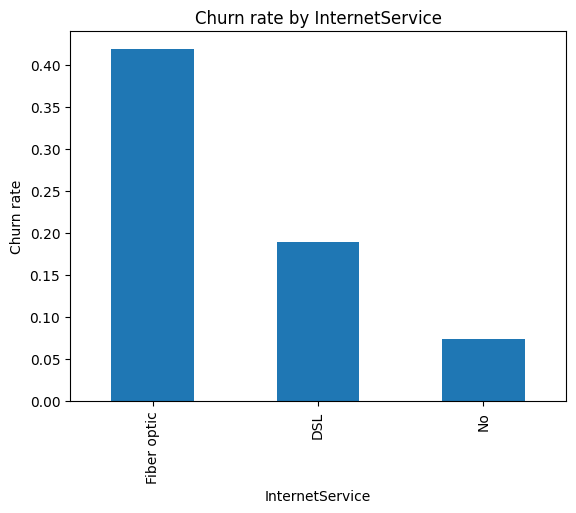

In [12]:
# Show churn rate by top 6 categorical columns (by unique count, not too large)
small_cats = [c for c in cat_cols if df[c].nunique() <= 10]
small_cats = small_cats[:6]

for c in small_cats:
    tmp = df[[c, "_target"]].copy()
    tmp[c] = tmp[c].astype(str)
    churn_rate = tmp.groupby(c)["_target"].mean().sort_values(ascending=False)

    plt.figure()
    churn_rate.plot(kind="bar")
    plt.title(f"Churn rate by {c}")
    plt.ylabel("Churn rate")
    plt.show()


In [13]:
os.makedirs("../artifacts/data", exist_ok=True)
eda_out = "../artifacts/data/eda_with_target.csv"
df.to_csv(eda_out, index=False)
print("Saved:", eda_out)


Saved: ../artifacts/data/eda_with_target.csv
